In [43]:
import sys
sys.path.append('../')
import compile_dataset as ds
import regressor as rg
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [59]:
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
 
    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

In [2]:
df = ds.get_dataset_df()

loading meta files
meta loaded


In [7]:
set(df['zoom'])

{0, 1, 2, 3, 4, 5, 6, 7, 8}

In [15]:
next(df.sample(n=1).iterrows())[1]

filename    /data/visitors/biomax/20180479/20181119/raw/Sa...
y                                                          23
sample                                                   4-08
scan                                                        2
zoom                                                        5
Name: 1063, dtype: object

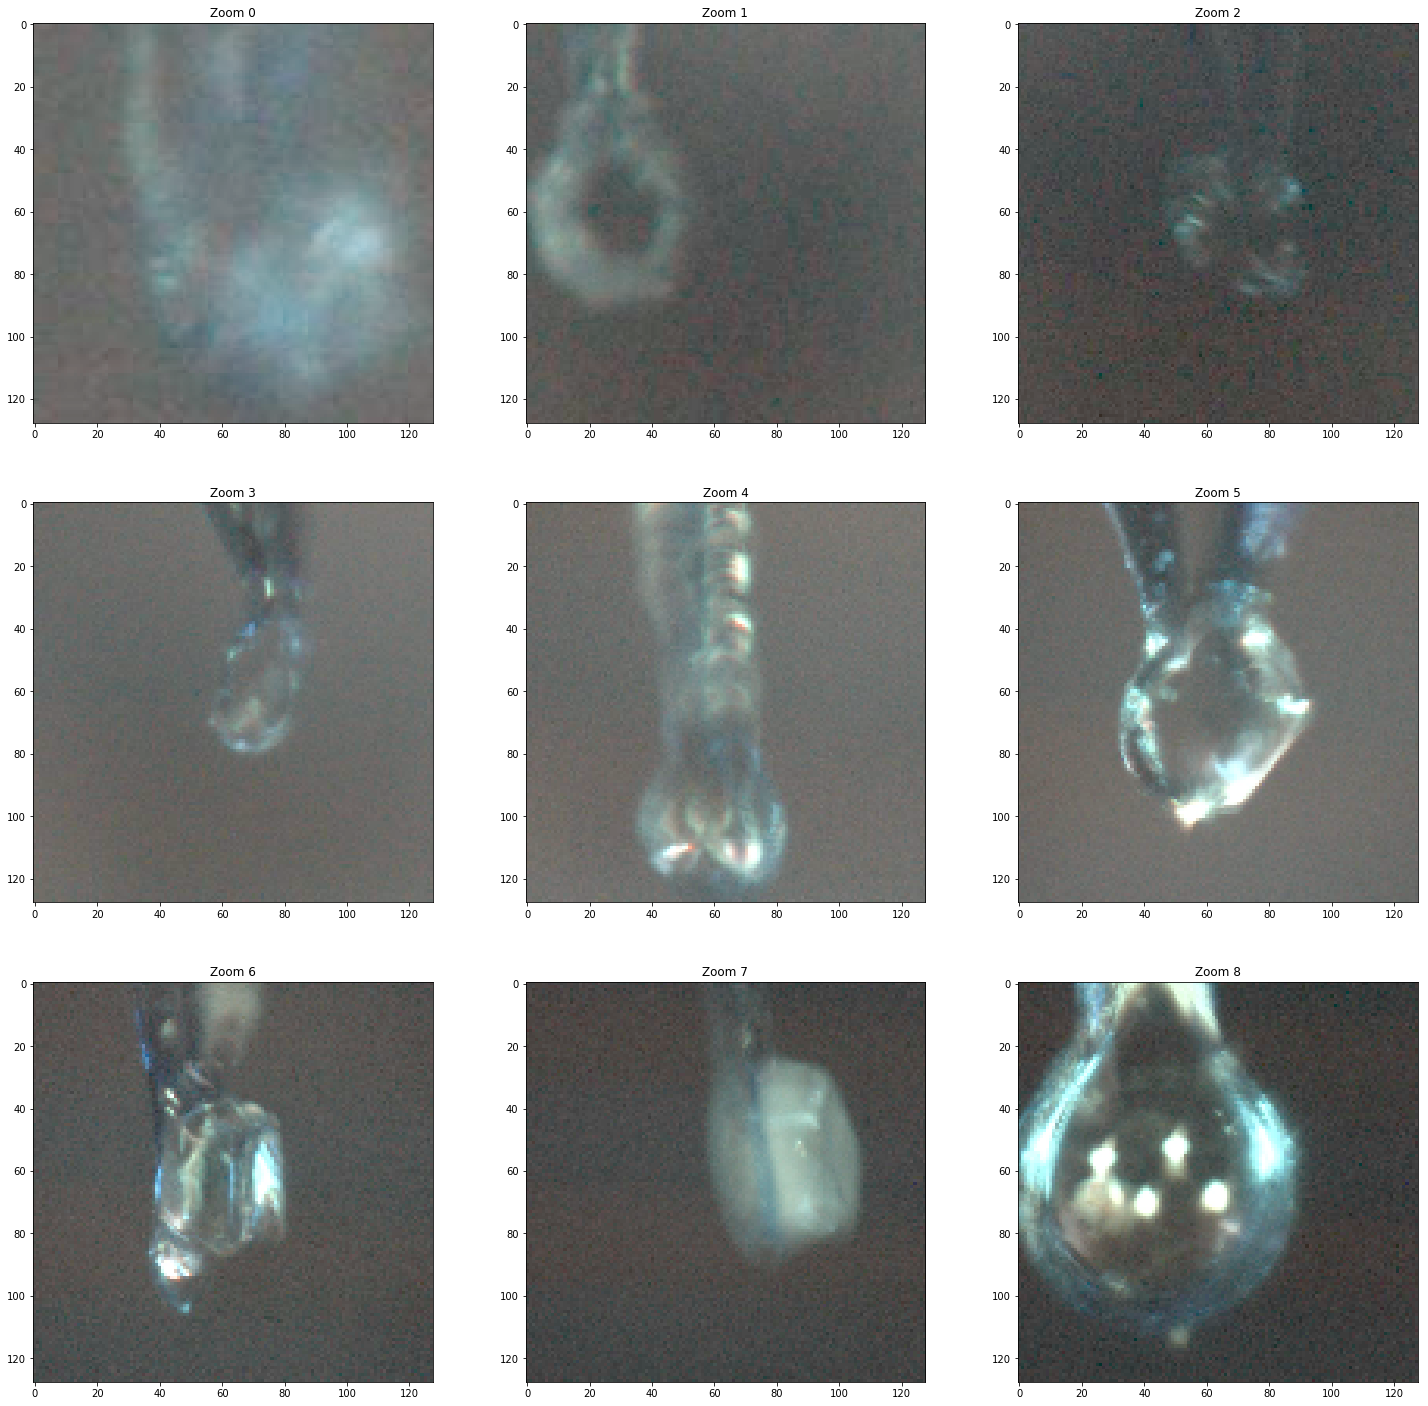

In [64]:
fig = plt.figure(figsize=(25,25))
for i in range(9):
    fig.add_subplot(3,3,i+1, title=f'Zoom {i}')
    row = next(df[df['zoom'] == i].sample(n=1).iterrows())[1]
    img = cv2.imread(row['filename'])
    img = ds.prep_img(img, crop_radius=(64+64*i))
    img = adjust_gamma(img, gamma=2.5)
    #img = ds.prep_img(img, crop_radius=(128+30*i*i))
    plt.imshow(img)